### Import Library

In [1]:
import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Prepare Data

In [2]:
test_features = pd.read_csv('test_features.csv')
test_features = test_features[['Age','Fare']]
test_features.head(10)

,Age,Fare
0,29.699118,15.2458
1,31.000000,10.5000
2,20.000000,7.9250
3,6.000000,33.0000
4,14.000000,11.2417
5,26.000000,78.8500
6,29.699118,7.7500
7,16.000000,18.0000
8,16.000000,7.7500
9,19.000000,26.2833


### Define Size Bin

In [3]:
def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

In [4]:
bin_size=10    
bins = compute_histogram_bins(test_features['Age'], bin_size)

heatmap_data=test_features.groupby(pd.cut(test_features['Age'], bins)).count()

heatmap_data=heatmap_data[['Age']]
heatmap_data

,Age
Age,
"(0.0, 10.0]",10
"(10.0, 20.0]",27
"(20.0, 30.0]",78
"(30.0, 40.0]",36
"(40.0, 50.0]",15
"(50.0, 60.0]",5
"(60.0, 70.0]",6
"(70.0, 80.0]",2


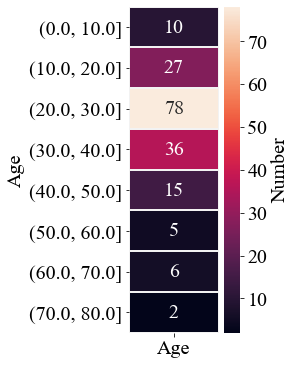

In [5]:
plt.rc('font',family = 'Times New Roman',  size=20)


fig = plt.figure(figsize=(2,6))
ax1 = fig.add_subplot(1,1,1)

heat_map = sns.heatmap(heatmap_data,ax=ax1, linewidths = 1, linecolor= '222222',annot =heatmap_data,annot_kws={'size':20}, cbar_kws={'label': 'Number'},zorder=1)